<a href="https://colab.research.google.com/github/dunliangyang2010/Deep-Learning-practice/blob/master/labelme_json_to_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import json
import numpy as np
import os

In [ ]:
# classes_name = ['bg', 'oil', 'defect2']
classes_name = ['bg', 'dog', 'cat']
cls_map = {name: i for i, name in enumerate(classes_name)}
cls_map

{'bg': 0, 'cat': 2, 'dog': 1}

In [ ]:
img_path = 'cat-dog.jpg'
json_path = 'cat-dog.json'

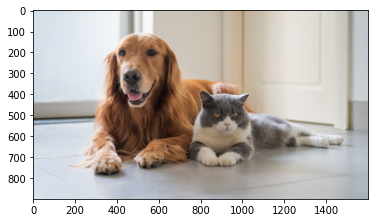

In [ ]:
img = cv2.imread(img_path)[:,:,::-1]
plt.imshow(img)

In [ ]:
data = json.load(open(json_path))

In [ ]:
data

{'flags': {},
 'imageData': None,
 'imageHeight': 900,
 'imagePath': '../img/cat-dog.jpg',
 'imageWidth': 1600,
 'shapes': [{'flags': {},
   'group_id': None,
   'label': 'dog',
   'points': [[499.6585365853658, 104.58536585365852],
    [417.9512195121951, 118.0],
    [395.99999999999994, 164.34146341463412],
    [371.60975609756093, 188.73170731707313],
    [352.0975609756097, 236.29268292682923],
    [350.8780487804878, 280.19512195121945],
    [322.8292682926829, 420.43902439024384],
    [305.7560975609756, 514.3414634146341],
    [289.9024390243902, 578.9756097560975],
    [271.60975609756093, 685.0731707317073],
    [159.41463414634146, 747.2682926829267],
    [228.92682926829266, 763.1219512195121],
    [283.80487804878044, 791.170731707317],
    [430.1463414634146, 777.7560975609755],
    [508.19512195121945, 769.2195121951219],
    [559.4146341463414, 769.2195121951219],
    [727.7073170731707, 735.0731707317073],
    [737.4634146341463, 714.3414634146341],
    [737.46341463414

In [ ]:
height = data['imageHeight']
width = data['imageWidth']

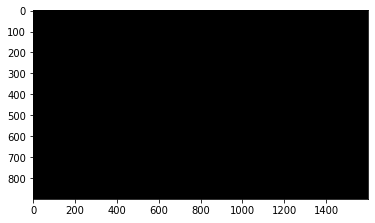

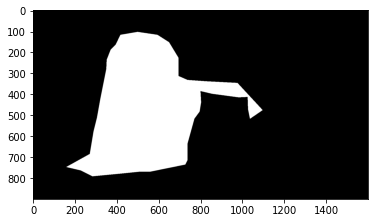

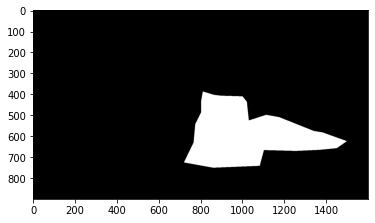

In [ ]:
# Draw Object mask
mask = np.zeros((len(classes_name), height, width))
for shape in data['shapes']:
    cls_name = shape['label']
    cls_idx = cls_map[cls_name]
    points = shape['points']
    cv2.fillPoly(mask[cls_idx], np.array([points], dtype=np.int32), 255) # fill object with 255

for m in mask:
    plt.imshow(m, cmap='gray')
    plt.show()

In [ ]:
# update backgroud mask
mask[0] = 255-np.max(mask[1:], axis=0)

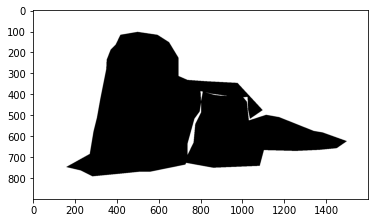

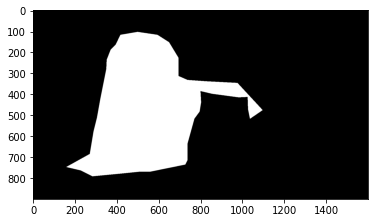

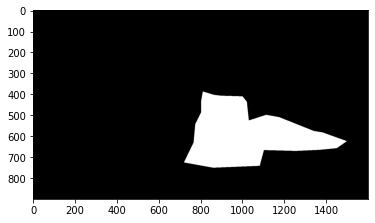

In [ ]:
# show all masks
for m in mask:
    plt.imshow(m, cmap='gray')
    plt.show()

In [ ]:
# Get File name
filename_img = os.path.split(img_path)[-1]
filename = filename_img.split('.')[0]
filename

'cat-dog'

In [ ]:
# Save Mask File
for i, m in enumerate(mask):
    path_save = f'{filename}_mask_{i}.png'
    cv2.imwrite(path_save, m)